In [23]:
import numpy as np
import pandas as pd

pd.set_option("display.max.columns", 100)
# to draw pictures in jupyter notebook
%matplotlib inline
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(15,10)})

In [2]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [4]:
df = pd.read_csv(DATA_URL + "adult.data.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1. How many men and women (sex feature) are represented in this dataset?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df["sex"].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

2. What is the average age (age feature) of women?

In [9]:
df[df["sex"]=="Female"]["age"].mean()

36.85823043357163

3. What is the percentage of German citizens (native-country feature)?

In [13]:
df["native-country"].value_counts(normalize=True)

United-States                 0.895857
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                

4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature) and those who earn less than 50K per year?

In [16]:
df[df["salary"]=="<=50K"]["age"].mean()

36.78373786407767

In [17]:
df[df["salary"]==">50K"]["age"].mean()

44.24984058155847

In [18]:
df[df["salary"]=="<=50K"]["age"].std()

14.020088490824813

In [19]:
df[df["salary"]==">50K"]["age"].std()

10.51902771985177

6. Is it true that people who earn more than 50K have at least high school education? (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)

<AxesSubplot:xlabel='education', ylabel='count'>

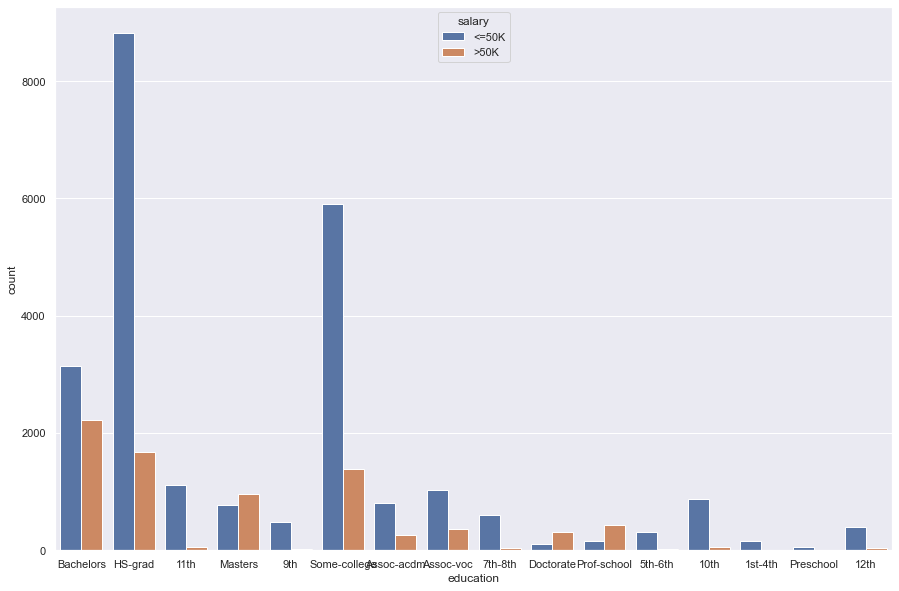

In [24]:
sns.countplot(x="education", hue="salary", data=df)

In [26]:
pd.crosstab(df["education"], df["salary"], margins=True, normalize=True)

salary,<=50K,>50K,All
education,,,
10th,0.026750,0.001904,0.028654
11th,0.034243,0.001843,0.036086
12th,0.012285,0.001013,0.013298
1st-4th,0.004975,0.000184,0.005160
5th-6th,0.009736,0.000491,0.010227
7th-8th,0.018611,0.001228,0.019840
9th,0.014957,0.000829,0.015786
Assoc-acdm,0.024631,0.008139,0.032769
Assoc-voc,0.031357,0.011087,0.042443


7. Display age statistics for each race (race feature) and each gender (sex feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.

In [67]:
df.groupby(["race", "sex"])["age"].describe(percentiles=[])

count       mean        std   min   50%   max
race               sex                                                    
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  36.0  80.0
                   Male      192.0  37.208333  12.049563  17.0  35.0  82.0
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  33.0  75.0
                   Male      693.0  39.073593  12.883944  18.0  37.0  90.0
Black              Female   1555.0  37.854019  12.637197  17.0  37.0  90.0
                   Male     1569.0  37.682600  12.882612  17.0  36.0  90.0
Other              Female    109.0  31.678899  11.631599  17.0  29.0  74.0
                   Male      162.0  34.654321  11.355531  17.0  32.0  77.0
White              Female   8642.0  36.811618  14.329093  17.0  35.0  90.0
                   Male    19174.0  39.652498  13.436029  17.0  38.0  90.0

8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (marital-status feature)? Consider as married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.

In [50]:
df[(df["sex"] == "Male") & (df["marital-status"].str.startswith("Married"))]["salary"].value_counts(normalize=True)

<=50K    0.559486
>50K     0.440514
Name: salary, dtype: float64

9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?

In [66]:
max_load = df["hours-per-week"].max()

num_crazy_workers = df[df["hours-per-week"] == max_load].shape[0]

rich_share = float(
    df[(df["hours-per-week"] == max_load) & (df["salary"] == ">50K")].shape[0] / num_crazy_workers
)

max_load, num_crazy_workers, rich_share

(99, 85, 0.29411764705882354)

10. Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). What will these be for Japan?

In [86]:
pd.crosstab(df["native-country"], df["salary"], values=df["hours-per-week"], aggfunc=np.mean)

salary,<=50K,>50K
native-country,,
?,40.164760,45.547945
Cambodia,41.416667,40.000000
Canada,37.914634,45.641026
China,37.381818,38.900000
Columbia,38.684211,50.000000
Cuba,37.985714,42.440000
Dominican-Republic,42.338235,47.000000
Ecuador,38.041667,48.750000
El-Salvador,36.030928,45.000000


done